In [1]:
import nflreadpy as nfl
import pandas as pd
import seaborn as sns
import sqlalchemy as sql
import matplotlib.pyplot as plt

In [2]:
draft = nfl.load_draft_picks()
draft.head()

season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,category,side,college,age,to,allpro,probowls,seasons_started,w_av,car_av,dr_av,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
i32,i32,i32,str,str,str,str,str,bool,str,str,str,str,i32,i32,i32,i32,i32,i32,bool,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,f64
1980,1,1,"""DET""","""""","""SimsBi00""","""billy-sims-1""","""Billy Sims""",false,"""RB""","""RB""","""O""","""Oklahoma""",24,1984,0,3,5,58,null,58,60,0,0,0,0,0,1131,5106,42,186,2072,5,null,null,null
1980,1,2,"""NYJ""","""""","""JoneLa00""","""lam-jones-1""","""Lam Jones""",false,"""WR""","""WR""","""O""","""Texas""",22,1984,0,0,3,21,null,21,61,0,0,0,0,0,9,17,0,138,2322,13,null,null,null
1980,1,3,"""CIN""","""""","""MunoAn00""","""""","""Anthony Munoz""",true,"""T""","""OL""","""O""","""USC""",22,1992,9,11,12,138,null,138,185,0,0,0,0,0,0,0,0,7,18,4,null,null,null
1980,1,4,"""GNB""","""""","""ClarBr23""","""bruce-clark-1""","""Bruce Clark""",false,"""DE""","""DL""","""D""","""Penn St.""",22,1989,0,1,6,46,null,null,113,0,0,0,0,0,0,0,0,0,0,0,null,1,39.5
1980,1,5,"""BAL""","""""","""DickCu00""","""curtis-dickey-1""","""Curtis Dickey""",false,"""RB""","""RB""","""O""","""Texas A&M""",23,1986,0,0,5,37,null,34,85,1,1,63,1,0,937,4019,32,134,1577,8,null,null,null


In [3]:
draft_df = draft.to_pandas()

In [4]:
type(draft_df)

pandas.core.frame.DataFrame

In [5]:
draft_df = draft_df.query('season >= 2000 and season <= 2025')

draft_df.head()

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
6026,2000,1,1,CLE,None,BrowCo22,courtney-brown-1,Courtney Brown,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,NaN,19.0
6027,2000,1,2,WAS,None,ArriLa00,lavar-arrington-1,LaVar Arrington,False,LB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,338.0,3.0,23.5
6028,2000,1,3,WAS,None,SamuCh00,chris-samuels-2,Chris Samuels,False,T,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6029,2000,1,4,CIN,None,WarrPe00,peter-warrick-1,Peter Warrick,False,WR,...,0.0,53.0,360.0,2.0,275.0,2991.0,18.0,3.0,NaN,NaN
6030,2000,1,5,BAL,None,LewiJa00,jamal-lewis-2,Jamal Lewis,False,RB,...,0.0,2542.0,10607.0,58.0,221.0,1879.0,4.0,NaN,NaN,NaN


In [6]:
draft_df = draft_df.drop(columns=['gsis_id', 'pfr_player_id', 'cfb_player_id'])
draft_df

,season,round,pick,team,pfr_player_name,hof,position,category,side,college,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
6026,2000,1,1,CLE,Courtney Brown,False,DE,DL,D,Penn St.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,NaN,19.0
6027,2000,1,2,WAS,LaVar Arrington,False,LB,LB,D,Penn St.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,338.0,3.0,23.5
6028,2000,1,3,WAS,Chris Samuels,False,T,OL,O,Alabama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6029,2000,1,4,CIN,Peter Warrick,False,WR,WR,O,Florida St.,...,0.0,53.0,360.0,2.0,275.0,2991.0,18.0,3.0,NaN,NaN
6030,2000,1,5,BAL,Jamal Lewis,False,RB,RB,O,Tennessee,...,0.0,2542.0,10607.0,58.0,221.0,1879.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,2025,7,253,MIA,Zeek Biggers,False,DL,DL,D,Georgia Tech,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,1.5
12666,2025,7,254,NOR,Fadil Diggs,False,DE,DL,D,Syracuse,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
12667,2025,7,255,HOU,Luke Lachey,False,TE,TE,O,Iowa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12668,2025,7,256,LAC,Trikweze Bridges,False,SAF,DB,D,Florida,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0,NaN


In [7]:
draft_df.columns

Index(['season', 'round', 'pick', 'team', 'pfr_player_name', 'hof', 'position',
       'category', 'side', 'college', 'age', 'to', 'allpro', 'probowls',
       'seasons_started', 'w_av', 'car_av', 'dr_av', 'games',
       'pass_completions', 'pass_attempts', 'pass_yards', 'pass_tds',
       'pass_ints', 'rush_atts', 'rush_yards', 'rush_tds', 'receptions',
       'rec_yards', 'rec_tds', 'def_solo_tackles', 'def_ints', 'def_sacks'],
      dtype='object')

In [8]:
draft_df = draft_df.rename(columns={'pfr_player_name' : 'name'})

In [9]:
draft_df.dr_av

6026     21.0
6027     45.0
6028     63.0
6029     25.0
6030     53.0
         ... 
12665     1.0
12666     0.0
12667     NaN
12668     NaN
12669     0.0
Name: dr_av, Length: 6644, dtype: float64

In [10]:
draft_df.isnull().sum()

season                 0
round                  0
pick                   0
team                   0
name                   0
hof                    0
position               0
category               0
side                   2
college                0
age                  264
to                   585
allpro                 0
probowls               0
seasons_started        0
w_av                 585
car_av              6644
dr_av                993
games                585
pass_completions     585
pass_attempts        585
pass_yards           585
pass_tds             585
pass_ints            586
rush_atts            585
rush_yards           585
rush_tds             585
receptions           585
rec_yards            585
rec_tds              585
def_solo_tackles    2414
def_ints            5243
def_sacks           4733
dtype: int64

In [11]:
draft_df = draft_df.drop(columns=['dr_av'])

In [12]:
draft_df.columns

Index(['season', 'round', 'pick', 'team', 'name', 'hof', 'position',
       'category', 'side', 'college', 'age', 'to', 'allpro', 'probowls',
       'seasons_started', 'w_av', 'car_av', 'games', 'pass_completions',
       'pass_attempts', 'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts',
       'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'rec_tds',
       'def_solo_tackles', 'def_ints', 'def_sacks'],
      dtype='object')

In [13]:
draft_df['av_per_game'] = draft_df['w_av'] / draft_df['games']

In [14]:
draft_df['bust'] = (draft_df['w_av'] < 10).astype(int)

In [15]:
roi_by_round = (
    draft_df.groupby('round')
      .agg(
          players=('name', 'count'),
          avg_av=('w_av', 'mean'),
          median_av=('w_av', 'median'),
          avg_starts=('seasons_started', 'mean'),
          bust_rate=('bust', 'mean')
      )
      .reset_index()
      .sort_values('round')
)

roi_by_round

,round,players,avg_av,median_av,avg_starts,bust_rate
0,1,827,38.355502,33.0,4.784764,0.146312
1,2,827,25.258537,20.0,3.238210,0.285369
2,3,935,17.393209,10.0,2.038503,0.466310
3,4,955,13.497802,7.0,1.470157,0.542408
4,5,952,10.356813,4.0,1.040966,0.606092
5,6,1026,8.003488,3.0,0.667641,0.629630
6,7,1122,6.864426,2.0,0.516043,0.598930


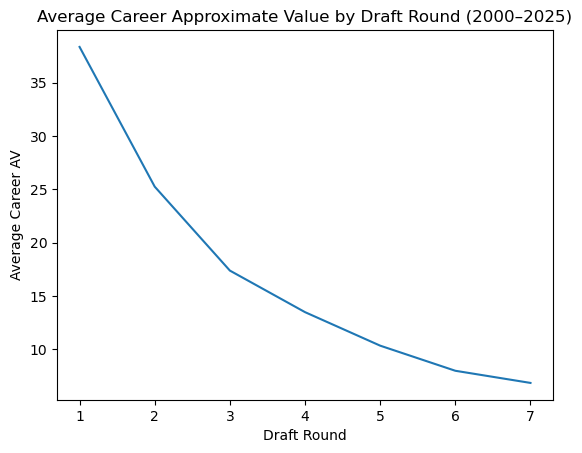

In [16]:
plt.figure()
plt.plot(roi_by_round['round'], roi_by_round['avg_av'])
plt.title("Average Career Approximate Value by Draft Round (2000–2025)")
plt.xlabel("Draft Round")
plt.ylabel("Average Career AV")
plt.show()

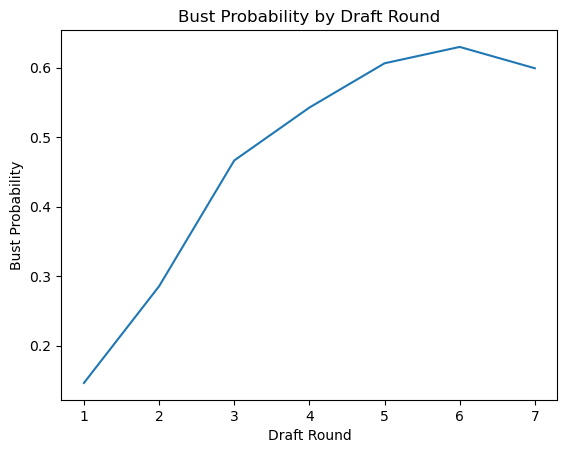

In [17]:
plt.figure()
plt.plot(roi_by_round['round'], roi_by_round['bust_rate'])
plt.title("Bust Probability by Draft Round")
plt.xlabel("Draft Round")
plt.ylabel("Bust Probability")
plt.show()

In [18]:
draft_df.to_csv('draftpicks.csv')